In [1]:
%matplotlib inline
import pandas as pd
from os import listdir
from matplotlib import pyplot as plt
import numpy as np
import glob, re
import seaborn as sns
from datetime import datetime,date
np.random.seed(41)

In [2]:
%%bash
ls data/

TABLE_III._Deaths_in_122_U.S._cities.csv
timeseries_events.csv
timeseries_users.csv


In [3]:
data = pd.read_csv('data/TABLE_III._Deaths_in_122_U.S._cities.csv')
events = pd.read_csv('data/timeseries_events.csv')
users = pd.read_csv('data/timeseries_users.csv')

# Question 4

In [45]:
data.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


In [46]:
data.shape

(5148, 19)

In [47]:
data['MMWR YEAR'].describe()

count    5148.0
mean     2016.0
std         0.0
min      2016.0
25%      2016.0
50%      2016.0
75%      2016.0
max      2016.0
Name: MMWR YEAR, dtype: float64

In [48]:
print(data['MMWR WEEK'].describe())
print(data['MMWR WEEK'].nunique())

count    5148.000000
mean       20.000000
std        11.255722
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        39.000000
Name: MMWR WEEK, dtype: float64
39


In [49]:
print(data['Reporting Area'].describe())
print(data['Reporting Area'].nunique())

count             5148
unique             134
top       San Jose, CA
freq                39
Name: Reporting Area, dtype: object
134


In [50]:
data.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


In [51]:
data[data['Reporting Area']=='Total']

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1,Location 2
9,Total,2016,1,12789.0,NaN,8600.0,NaN,2948.0,NaN,797.0,NaN,242.0,NaN,200.0,NaN,814.0,NaN,NaN,NaN


In [55]:
print(data[data['Reporting Area']=='Total_'].shape)
data[data['Reporting Area']=='Total_'].head()

(38, 19)


,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1,Location 2
141,Total_,2016,2,11708.0,NaN,8026.0,NaN,2656.0,NaN,645.0,NaN,191.0,NaN,186.0,NaN,885.0,NaN,NaN,NaN
273,Total_,2016,3,12150.0,NaN,8394.0,NaN,2706.0,NaN,651.0,NaN,213.0,NaN,165.0,NaN,826.0,NaN,NaN,NaN
405,Total_,2016,4,12546.0,NaN,8503.0,NaN,2868.0,NaN,711.0,NaN,242.0,NaN,221.0,NaN,850.0,NaN,NaN,NaN
537,Total_,2016,5,12880.0,NaN,8816.0,NaN,2878.0,NaN,740.0,NaN,260.0,NaN,185.0,NaN,804.0,NaN,NaN,NaN
669,Total_,2016,6,12575.0,NaN,8463.0,NaN,2885.0,NaN,771.0,NaN,256.0,NaN,197.0,NaN,868.0,NaN,NaN,NaN


In [56]:
data = data[data['Reporting Area']!='Total']
data = data[data['Reporting Area']!='Total_']

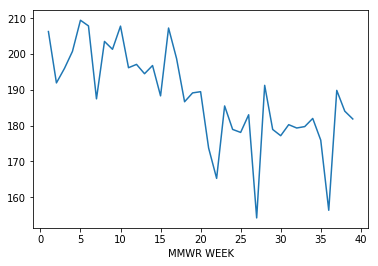

In [57]:
deathsVStime = data.groupby('MMWR WEEK')['All causes, by age (years), All Ages**'].mean()
deathsVStime.plot()

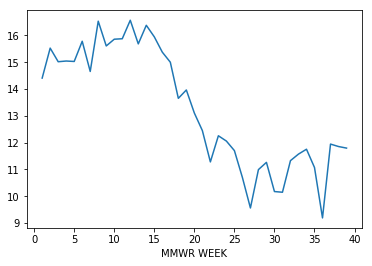

In [58]:
PIdeaths = data.groupby('MMWR WEEK')['P&I Total'].mean()
PIdeaths.plot()

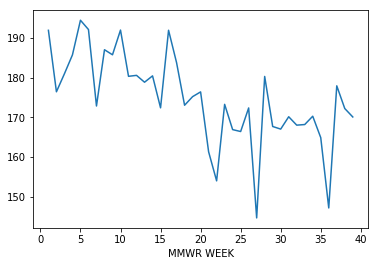

In [59]:
(deathsVStime - PIdeaths).plot()

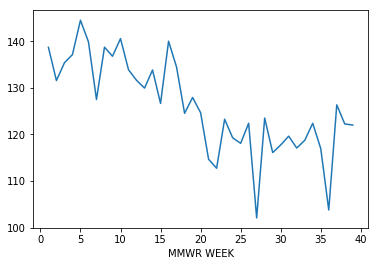

In [60]:
data.groupby('MMWR WEEK')['All causes, by age (years), >=65'].mean().plot()
#data.groupby('MMWR WEEK')['All causes, by age (years), 45-64'].mean().plot()

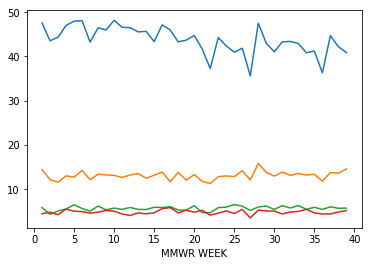

In [61]:
data.groupby('MMWR WEEK')['All causes, by age (years), 45-64'].mean().plot()
data.groupby('MMWR WEEK')['All causes, by age (years), 25-44'].mean().plot()
data.groupby('MMWR WEEK')['All causes, by age (years), 1-24'].mean().plot()
data.groupby('MMWR WEEK')['All causes, by age (years), LT 1'].mean().plot()

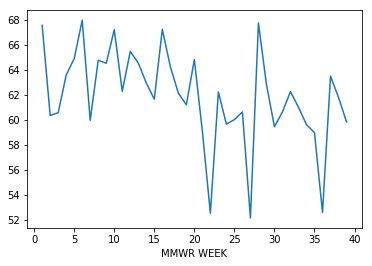

In [62]:
older_deaths = data.groupby('MMWR WEEK')['All causes, by age (years), >=65'].mean()
(deathsVStime - older_deaths).plot()

In [64]:
data.groupby('MMWR WEEK').count()['Reporting Area'].unique()

array([131])

In [65]:
data.groupby('Reporting Area')['All causes, by age (years), All Ages**'].mean().sort_values(ascending=False)

Reporting Area
E.N. Central         2123.923077
Pacific              1751.025641
Mid. Atlantic        1663.230769
W.S. Central         1572.461538
S. Atlantic          1158.717949
Mountain             1146.333333
New York City, NY    1013.736842
E.S. Central          998.538462
W.N. Central          612.179487
New England           525.974359
Houston, TX           385.243243
Las Vegas, NV         334.947368
Los Angeles, CA       300.230769
San Antonio, TX       290.382353
Chicago, IL           284.351351
Cleveland, OH         280.256410
Columbus, OH          249.729730
Sacramento, CA        227.435897
Dallas, TX            223.794872
San Jose, CA          210.512821
Phoenix, AZ           203.789474
Indianapolis, IN      200.846154
Memphis, TN           194.200000
Birmingham, AL        185.769231
Tucson, AZ            178.583333
Nashville, TN         173.589744
San Diego, CA         171.447368
Baltimore, MD         164.184211
Jacksonville, FL      163.794872
Atlanta, GA           161.21

In [66]:
age_columns = ['All causes, by age (years), >=65',
           'All causes, by age (years), 45-64',
           'All causes, by age (years), 25-44',
          'All causes, by age (years), 1-24',
          'All causes, by age (years), LT 1']
data['new_total'] = 0
for column in age_columns:
    data['new_total'] += data[column]


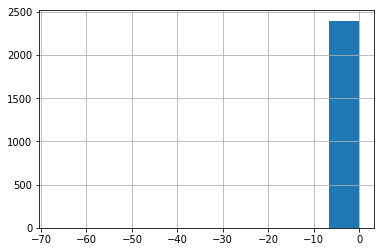

In [67]:
(data['new_total']-data['All causes, by age (years), All Ages**']).hist()

In [68]:
data.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1,Location 2,new_total
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN,600.0
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN,807.0
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN,2468.0
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN,633.0
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN,1401.0


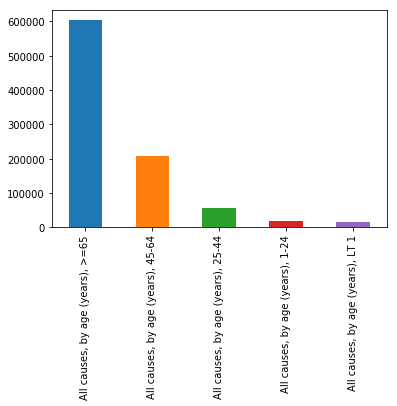

In [69]:
data.sum()[4:9].plot.bar()

## HOW TO CONSTRUCT AN INTEREVENT INTERVAL HISTOGRAM

# QUESTION 5:

In [44]:
events.head()

,user_id,event_date
0,0,2015-02-26 00:00:00
1,0,2015-03-10 00:00:00
2,0,2015-03-30 00:00:00
3,0,2015-02-15 00:00:00
4,0,2015-02-18 00:00:00


In [42]:
users.head()

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4


In [6]:
event_data = events.merge(users,on='user_id',how='left')
event_data.head()

,user_id,event_date,age,gender
0,0,2015-02-26 00:00:00,51.0,f
1,0,2015-03-10 00:00:00,51.0,f
2,0,2015-03-30 00:00:00,51.0,f
3,0,2015-02-15 00:00:00,51.0,f
4,0,2015-02-18 00:00:00,51.0,f


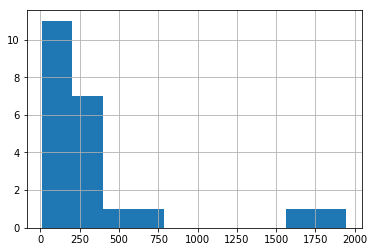

In [8]:
event_data[(event_data.age>=30)&(event_data.gender=='m')].groupby('user_id').count()['event_date'].hist()

In [16]:
event_data['event_date'] = pd.to_datetime(event_data['event_date'])

In [17]:
event_data.head()

,user_id,event_date,age,gender
0,0,2015-02-26,51.0,f
1,0,2015-03-10,51.0,f
2,0,2015-03-30,51.0,f
3,0,2015-02-15,51.0,f
4,0,2015-02-18,51.0,f


In [18]:
event_data.shape

(30593, 4)

In [29]:
event_data.sort_values(['user_id','event_date'],inplace=True)

## Easy way to calculate interevent intervals

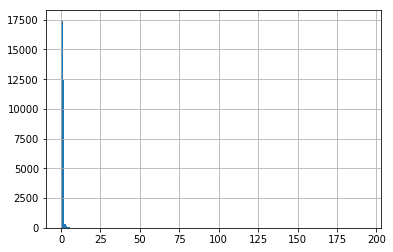

In [43]:
event_data.groupby('user_id')['event_date'].diff().dt.days.dropna().hist(bins=200)

## Difficult way to calculate interevent intervals

In [20]:
interevent = []
for user_id in range(0,97):
    interevent.extend(event_data[event_data.user_id==user_id].sort_values('event_date')['event_date'].diff().dt.days.dropna().tolist())

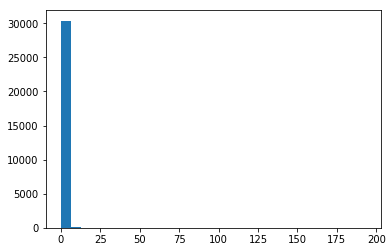

In [41]:
ax = plt.hist(interevent,bins=30)
#plt.xlim((-1,15))

In [152]:
np.sort(interevent)[-13000:]

array([   1.,    1.,    1., ...,  137.,  161.,  193.])

# BONUS INTERACTIVE PLOT

In [12]:
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

new_data = data.groupby('MMWR WEEK')['All causes, by age (years), >=65'].mean()

p1 = figure(x_axis_type='auto', 
            title="Deaths in older age group",
            plot_height=20,plot_width=20)
p1.grid.grid_line_alpha=0.3

p1.line(x=[i for i in range(1,40)],y=new_data,color='#FB9A99')
p1.legend.location = "top_left"


output_file("interactive.html", title="interactive example")

show(gridplot([[p1]], plot_width=400, plot_height=400))  

# open a browser